# 常微分方程处置问题的数值解法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Split
def Split(a, b, h):
    """
    a: the left endpoint of the inteval
    b: the right endpoint of the inteval
    h: step
    """
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    return t

## 显式Euler法

In [3]:
# Explicit Euler Method
def ExplicitEulerMethod(t, func, ini):
    """
    t: ndarray, the split of the inteval
    func: y' = f(t, y)
    ini: the initial value for the IVP
    """
    n = len(t)
    h = t[1] - t[0]
    y = np.zeros(n)
    y[0] = ini
    for i in range(1, n):
        y[i] = y[i-1] + h*f(t[i-1], y[i-1])
    return y

## 隐式Euler方法

In [4]:
# Implict Euler Method
def ImplictEulerMethod(t, func, ini, tol):
    """
    t: ndarray, the split of the inteval
    func: y' = f(t, y)
    ini: the initial value for IVP
    tol: iteration accuracy
    """
    n = len(t)
    h = t[1] - t[0]
    y = np.zeros(n)
    y[0] = ini
    for i in range(1, n):
        y0 = y[i-1] + h*func(t[i-1], y[i-1])
        y1 = y[i-1] + h*func(t[i-1], y0)
        while np.abs(y1 - y0) >= tol:
            y0 = y1
            y1 = y[i-1] + h*func(t[i-1], y0)
        y[i] = y1
    return y

## 梯形方法

In [5]:
# 梯形方法
def TrapezoidalMethod(t, func, ini, tol):
    """
    t: ndarray, the split of the inteval
    func: y' = f(t, y)
    ini: the initial value for IVP
    tol: iteration accuracy
    """
    n = len(t)
    h = t[1] - t[0]
    y = np.zeros(n)
    y[0] = ini
    for i in range(1, n):
        y0 = y[i-1] + h*func(t[i-1], y[i-1])
        y1 = y[i-1] + h*(func(t[i], y0) + func(t[i-1], y[i-1]))/2
        while np.abs(y1 - y0) >= tol:
            y0 = y1
            y1 = y[i-1] + h*(func(t[i], y0) + func(t[i-1], y[i-1]))/2
        y[i] = y1
    return y

## 改进的Euler方法

In [6]:
# Improved Euler Method
def ImprovedEulerMethod(t, func, ini):
    """
    t: ndarray, the split of the inteval
    func: y' = f(t, y)
    ini: the initial value for the IVP
    """
    n = len(t)
    h = t[1] - t[0]
    y = np.zeros(n)
    y[0] = ini
    for i in range(1, n):
        y0 = y[i-1] + h*func(t[i-1], y[i-1])
        y[i] = y[i-1] + h/2*(func(t[i-1], y[i-1]) + func(t[i], y0))
    return y

## Runge-Kutta Method

In [7]:
# Midpoint Formula
def MidpointFormula(t, func, ini):
    """
    t: ndarray, the split of the inteval
    func: y' = f(t, y)
    ini: the initial value for the IVP
    """
    n = len(t)
    h = t[1] - t[0]
    y = np.zeros(n)
    y[0] = ini
    for i in range(1, n):
        y[i] = y[i-1] + h*func(t[i-1] + h/2, y[i-1] + h/2*func(t[i-1], y[i-1]))
    return y

In [8]:
# 4-th Order Classic Runge-Kutta Method
def ClassicRungeKutta(t, func, ini):
    """
    t: ndarray, the split of the inteval
    func: y' = f(t, y)
    ini: the initial value for IVP
    """
    n = len(t)
    h = t[1] - t[0]
    y = np.zeros(n)
    y[0] = ini
    C = np.array([0, 1/2, 1/2, 1])
    B = np.array([1/6, 1/3, 1/3 ,1/6])
    A = np.diag([1/2, 1/2, 1], k=-1)
    for i in range(1, n):
        k = np.zeros(4)
        for j in range(4):
            y_step = 0
            for m in range(4):
                y_step += A[j, m]*k[m]
            k[j] = func(t[i-1] + C[j]*h, y[i-1] + h*y_step)
        phi = 0
        for j in range(4):
            phi += B[j]*k[j]
        y[i] = y[i-1] + h*phi
    return y

例 用显式Euler方法解处置问题 

$$
\begin{cases}
y' = -y(x) \\
y(0) = 1
\end{cases}
$$

取$h=0.1$，从$x=0$计算到$5.0$

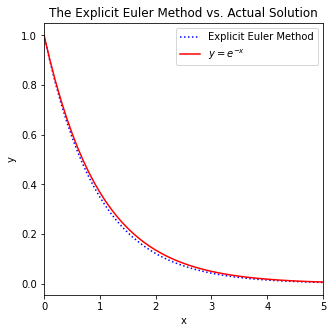

In [9]:
# define f(t, y)
def f(t, y):
    return -1*y


a, b, h, ini = 0, 5, 0.1, 1
x = Split(a, b, h)
y1 = ExplicitEulerMethod(x, f, ini)
# the actual solution
y = np.exp(-1*x)
plt.figure(figsize=(5, 5))
plt.plot(x, y1, 'b:', label="Explicit Euler Method")
plt.plot(x, y, 'r-', label="$y=e^{-x}$")
plt.title("The Explicit Euler Method vs. Actual Solution")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(a, b)
plt.show()

用显式Euler方法和梯形方法解微分方程初值问题
$$
\begin{cases}
y'(x) = -y + x + 1, \\
y(0) = 1.
\end{cases}
$$
取$h=0.1$，从$x=0$计算到$x=0.5$.

In [10]:
# define f(x, y)
def f(x, y):
    return -1*y + x + 1


a, b, h, ini = 0, 0.5, 0.1, 1
x = Split(a, b, h)
y1 = ExplicitEulerMethod(x, f, ini)
# 对于本题来说使用梯形方法得到的方程是一个线性方程，不需要迭代即可求解
# 但我们编写的是一个一般情况下的程序，所以给出了迭代精度

y2 = TrapezoidalMethod(x, f, ini, 1e-5)
# The actual solution is y = exp(-x) + x
y = np.exp(-x) + x
for item in zip(x, y1, y2, y):
    print(f"{item[0]:.1f}\t{item[1]:.6f}\t{item[2]:.6f}\t{item[3]:.6f}")

0.0	1.000000	1.000000	1.000000
0.1	1.000000	1.004762	1.004837
0.2	1.010000	1.018594	1.018731
0.3	1.029000	1.040633	1.040818
0.4	1.056100	1.070097	1.070320
0.5	1.090490	1.106278	1.106531


用显式Euler方法和改进的Euler方法来计算初值问题
$$
\begin{cases}
y'(x) = y(x) - x^2 + 1, \\
y(0) = \frac{1}{2}.
\end{cases}
$$
取$h=0.2$，从$x=0$计算到$x=2$.

In [11]:
# define f(x, y)
def f(x, y):
    return y - x**2 + 1


a, b, h, ini = 0, 2, 0.2, 1/2
x = Split(a, b, h)
y1 = ExplicitEulerMethod(x, f, ini)
y2 = ImprovedEulerMethod(x, f, ini)
# the actual solution y = (1 + x)^2 - \frac{1}{2}e^x
y = (1 + x)**2 - np.exp(x)/2
for item in zip(x, y1, y2, y):
    print(f"{item[0]:.1f}\t{item[1]:.7f}\t{item[2]:.7f}\t{item[3]:.7f}")

0.0	0.5000000	0.5000000	0.5000000
0.2	0.8000000	0.8260000	0.8292986
0.4	1.1520000	1.2069200	1.2140877
0.6	1.5504000	1.6372424	1.6489406
0.8	1.9884800	2.1102357	2.1272295
1.0	2.4581760	2.6176876	2.6408591
1.2	2.9498112	3.1495789	3.1799415
1.4	3.4517734	3.6936862	3.7324000
1.6	3.9501281	4.2350972	4.2834838
1.8	4.4281538	4.7556185	4.8151763
2.0	4.8657845	5.2330546	5.3054720


用改进的Euler方法及中点公式计算初值问题
$$
\begin{cases}
y'(x) = 1 + \frac{1}{x}y,\; x\in(1,2], \\
y(1) = 2
\end{cases}
$$
的近似解，并与初值问题准确解作比较. 取$h=0.25$. 初值问题的准确解为$y(x)=x\ln x + 2x$.

In [12]:
# define f(x, y)
def f(x, y):
    return 1 + y/x


a, b, h, ini = 1, 2, 0.25, 2
x = Split(a, b, h)
y1 = ImprovedEulerMethod(x, f, ini)
y2 = MidpointFormula(x, f, ini)
y3 = ClassicRungeKutta(x, f, ini)
y = x * np.log(x) + 2*x
for item in zip(x, y, y1, y2, y3):
    print(f"{item[0]:.2f}\t{item[1]:.7f}\t{item[2]:.7f}\t{item[3]:.7f}\t{item[4]:.7f}")

1.00	2.0000000	2.0000000	2.0000000	2.0000000
1.25	2.7789294	2.7750000	2.7777778	2.7789095
1.50	3.6081977	3.6008333	3.6060606	3.6081647
1.75	4.4793276	4.4688294	4.4763015	4.4792846
2.00	5.3862944	5.3728586	5.3824398	5.3862426
